# Baseball Data Analysis
#### Author: Anthony Giustino
#### Updated: June 4, 2018

This notebook is an exercise in the Data Analysis process. The following steps with be explored in the project.
>- Data Wrangling (Gather, Assess and Clean)
>- Exploratory Data Analysis
>- Draw Conclusions

In this project I will explore and analyze baseball data from 1871 to 2016 to try and uncover interesting trends in player salaries over time. The main statistics that will be observed for the purposes of this anlysis will be related to batting and pitching production and how they have an effect on salary.

## Gather Data

In [1]:
#Import all necessary packages
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)

In [2]:
#Load in data files for analyzing
teams_df = pd.read_csv('teams.csv')
salaries_df = pd.read_csv('salaries.csv')
master_df = pd.read_csv('master.csv')
batting_df = pd.read_csv('batting.csv')
pitching_df = pd.read_csv('pitching.csv')
fielding_df = pd.read_csv('fielding.csv')

## Assess Data

In [3]:
teams_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,1372,426,70,37,3,60,19.0,73.0,NaN,NaN,NaN,303,109,3.55,22,1,3,828,367,2,42,23,225,NaN,0.838,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,1196,323,52,21,10,60,22.0,69.0,NaN,NaN,NaN,241,77,2.76,25,0,1,753,308,6,28,22,218,NaN,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,NaN,N,NaN,249,1186,328,35,40,7,26,25.0,18.0,NaN,NaN,NaN,341,116,4.11,23,0,0,762,346,13,53,34,223,NaN,0.814,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,NaN,N,NaN,137,746,178,19,8,2,33,9.0,16.0,NaN,NaN,NaN,243,97,5.17,19,1,0,507,261,5,21,17,163,NaN,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,NaN,N,NaN,302,1404,403,43,21,1,33,15.0,46.0,NaN,NaN,NaN,313,121,3.72,32,1,0,879,373,7,42,22,227,NaN,0.839,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [4]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2835 entries, 0 to 2834
Data columns (total 48 columns):
yearID            2835 non-null int64
lgID              2785 non-null object
teamID            2835 non-null object
franchID          2835 non-null object
divID             1318 non-null object
Rank              2835 non-null int64
G                 2835 non-null int64
Ghome             2436 non-null float64
W                 2835 non-null int64
L                 2835 non-null int64
DivWin            1290 non-null object
WCWin             654 non-null object
LgWin             2807 non-null object
WSWin             2478 non-null object
R                 2835 non-null int64
AB                2835 non-null int64
H                 2835 non-null int64
2B                2835 non-null int64
3B                2835 non-null int64
HR                2835 non-null int64
BB                2835 non-null int64
SO                2715 non-null float64
SB                2691 non-null float64
CS    

In [5]:
#Review if a World Series was played in any particular year

years_ws = teams_df[['yearID','WSWin']].groupby('yearID', as_index=False).sum()
years_ws.head(15)

,yearID,WSWin
0,1871,NaN
1,1872,NaN
2,1873,NaN
3,1874,NaN
4,1875,NaN
5,1876,NaN
6,1877,NaN
7,1878,NaN
8,1879,NaN
9,1880,NaN


In [6]:
#Create a list of years where a World Series was played and won

years_ws = years_ws[years_ws['WSWin'].str.contains('Y', na=False)]
years_ws.head()

,yearID,WSWin
15,1886,NNNNNNNNNNNNNYNN
16,1887,NNNNNNYNNNNNNNNN
17,1888,NNNNNNNNNNYNNNNN
18,1889,NNNNNNNNNNYNNNNN
32,1903,YNNNNNNNNNNNNNNN


Since there were a number of years where a World Series was not played or no World Series was won, we do not want to include those years in this analysis. 

>- Remove unnecessary columns ('lgID', 'IPouts' -> 'FP', 'park' -> 'teamIDretro', etc.)
>- Remove any years not listed in the **years_ws** dataframe

In [7]:
salaries_df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [8]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [9]:
salaries_df['yearID'].describe()

count    26428.000000
mean      2000.878727
std          8.909314
min       1985.000000
25%       1994.000000
50%       2001.000000
75%       2009.000000
max       2016.000000
Name: yearID, dtype: float64

>- The salaries data starts from the year 1985. The **teams_df** should reflect teams starting in 1985 (years prior should be removed

In [10]:
master_df.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [11]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19105 entries, 0 to 19104
Data columns (total 24 columns):
playerID        19105 non-null object
birthYear       18973 non-null float64
birthMonth      18803 non-null float64
birthDay        18656 non-null float64
birthCountry    19036 non-null object
birthState      18534 non-null object
birthCity       18925 non-null object
deathYear       9441 non-null float64
deathMonth      9440 non-null float64
deathDay        9439 non-null float64
deathCountry    9436 non-null object
deathState      9390 non-null object
deathCity       9431 non-null object
nameFirst       19068 non-null object
nameLast        19105 non-null object
nameGiven       19068 non-null object
weight          18251 non-null float64
height          18320 non-null float64
bats            17920 non-null object
throws          18126 non-null object
debut           18910 non-null object
finalGame       18910 non-null object
retroID         19049 non-null object
bbrefID        

In [12]:
master_df[master_df['debut'].isnull()]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
55,actama99,1969.0,1.0,11.0,D.R.,San Pedro de Macoris,San Pedro de Macoris,NaN,NaN,NaN,NaN,NaN,NaN,Manny,Acta,Manuel Elias,172.0,74.0,R,R,NaN,NaN,actam801,actama99
56,adairbi99,1913.0,2.0,10.0,USA,AL,Mobile,2002.0,6.0,17.0,USA,AL,Bay Minette,Bill,Adair,Marion Danne,168.0,72.0,R,R,NaN,NaN,adaib801,adairbi99
444,armoubi99,1869.0,9.0,3.0,USA,PA,Homestead,1922.0,12.0,2.0,USA,MN,Minneapolis,Bill,Armour,William Reginald,NaN,NaN,NaN,NaN,NaN,NaN,armob801,armoubi99
703,bancrfr99,1846.0,5.0,9.0,USA,MA,Lancaster,1921.0,3.0,30.0,USA,OH,Cincinnati,Frank,Bancroft,Frank Carter,NaN,NaN,NaN,NaN,NaN,NaN,bancf801,bancrfr99
770,barlial99,1915.0,4.0,2.0,USA,IL,Springfield,1995.0,12.0,27.0,USA,IL,Springfield,Al,Barlick,Albert Joseph,185.0,71.0,NaN,NaN,NaN,NaN,barla901,barlial99
845,barroed99,1868.0,5.0,10.0,USA,IL,Springfield,1953.0,12.0,15.0,USA,NY,Port Chester,Ed,Barrow,Edward Grant,NaN,NaN,NaN,NaN,NaN,NaN,barre801,barroed99
1086,bellco99,1903.0,5.0,17.0,USA,MS,Starkville,1991.0,3.0,7.0,USA,MO,St. Louis,Cool Papa,Bell,James Thomas,155.0,72.0,B,L,NaN,NaN,NaN,bellco99
1287,bevinte99,1956.0,7.0,7.0,USA,OH,Akron,NaN,NaN,NaN,NaN,NaN,NaN,Terry,Bevington,Terry Paul,190.0,74.0,R,R,NaN,NaN,bevit801,bevinte99
1288,bezdehu99,1883.0,4.0,1.0,Czech Republic,NaN,Prague,1952.0,9.0,19.0,USA,NJ,Atlantic City,Hugo,Bezdek,Hugo Francis,NaN,NaN,NaN,NaN,NaN,NaN,bezdh801,bezdehu99
1296,bicke99,1848.0,NaN,NaN,USA,DC,Washington,1916.0,2.0,9.0,USA,DC,Washington,John,Bickerton,John A.,NaN,NaN,NaN,NaN,NaN,NaN,bicku801,bickejo99


>**master_df** contains player info not related to baseball performance. Some of these variables may be interesting to explore later in this report so I will keep all the columns.

In [13]:
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [14]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 22 columns):
playerID    102816 non-null object
yearID      102816 non-null int64
stint       102816 non-null int64
teamID      102816 non-null object
lgID        102079 non-null object
G           102816 non-null int64
AB          102816 non-null int64
R           102816 non-null int64
H           102816 non-null int64
2B          102816 non-null int64
3B          102816 non-null int64
HR          102816 non-null int64
RBI         102392 non-null float64
SB          101516 non-null float64
CS          79360 non-null float64
BB          102816 non-null int64
SO          94978 non-null float64
IBB         66251 non-null float64
HBP         100006 non-null float64
SH          96478 non-null float64
SF          66782 non-null float64
GIDP        76706 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 17.3+ MB


>- Removed rows prior to 1985
>- Drop 'IBB', 'HBP', 'SH', 'SF', 'GIDP' columns as they are not needed for this anlysis

In [15]:
pitching_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [16]:
pitching_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44963 entries, 0 to 44962
Data columns (total 30 columns):
playerID    44963 non-null object
yearID      44963 non-null int64
stint       44963 non-null int64
teamID      44963 non-null object
lgID        44832 non-null object
W           44963 non-null int64
L           44963 non-null int64
G           44963 non-null int64
GS          44963 non-null int64
CG          44963 non-null int64
SHO         44963 non-null int64
SV          44963 non-null int64
IPouts      44963 non-null int64
H           44963 non-null int64
ER          44963 non-null int64
HR          44963 non-null int64
BB          44963 non-null int64
SO          44963 non-null int64
BAOpp       43437 non-null float64
ERA         44874 non-null float64
IBB         30388 non-null float64
WP          44830 non-null float64
HBP         44405 non-null float64
BK          44963 non-null int64
BFP         44724 non-null float64
GF          44830 non-null float64
R           4496

>- Removed rows prior to 1985

In [17]:
fielding_df.head()

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,abercda01,1871,1,TRO,NaN,SS,1,NaN,NaN,1,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,2B,22,NaN,NaN,67,72.0,42.0,5.0,NaN,NaN,NaN,NaN,NaN
2,addybo01,1871,1,RC1,NaN,SS,3,NaN,NaN,8,14.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN
3,allisar01,1871,1,CL1,NaN,2B,2,NaN,NaN,1,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,allisar01,1871,1,CL1,NaN,OF,29,NaN,NaN,51,3.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN


In [18]:
fielding_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136815 entries, 0 to 136814
Data columns (total 18 columns):
playerID    136815 non-null object
yearID      136815 non-null int64
stint       136815 non-null int64
teamID      136815 non-null object
lgID        135312 non-null object
POS         136815 non-null object
G           136815 non-null int64
GS          85273 non-null float64
InnOuts     85273 non-null float64
PO          136815 non-null int64
A           136814 non-null float64
E           136813 non-null float64
DP          136814 non-null float64
PB          11230 non-null float64
WP          4189 non-null float64
SB          6138 non-null float64
CS          6138 non-null float64
ZR          4189 non-null float64
dtypes: float64(10), int64(4), object(4)
memory usage: 18.8+ MB


>- Remove rows prior to 1985
>- Remove all columns except playerID, yearID, POS, G

## Clean Data

In [19]:
#Create copies of dataframes
teams_df_copy = teams_df.copy()
salaries_df_copy = salaries_df.copy()
master_df_copy = master_df.copy()
batting_df_copy = batting_df.copy()
pitching_df_copy = pitching_df.copy()
fielding_df_copy = fielding_df.copy()

### teams_df

In [20]:
teams_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2835 entries, 0 to 2834
Data columns (total 48 columns):
yearID            2835 non-null int64
lgID              2785 non-null object
teamID            2835 non-null object
franchID          2835 non-null object
divID             1318 non-null object
Rank              2835 non-null int64
G                 2835 non-null int64
Ghome             2436 non-null float64
W                 2835 non-null int64
L                 2835 non-null int64
DivWin            1290 non-null object
WCWin             654 non-null object
LgWin             2807 non-null object
WSWin             2478 non-null object
R                 2835 non-null int64
AB                2835 non-null int64
H                 2835 non-null int64
2B                2835 non-null int64
3B                2835 non-null int64
HR                2835 non-null int64
BB                2835 non-null int64
SO                2715 non-null float64
SB                2691 non-null float64
CS    

#### Issues

>- Remove unnecessary columns ('lgID', 'IPouts' -> 'FP', 'park' -> 'teamIDretro', etc.)
>- Remove any years not listed in the **years_ws** dataframe

#### Clean

In [21]:
teams_df_copy.drop(['lgID','Ghome','divID','DivWin','WCWin','LgWin','IPouts','HA','HRA','BBA','SOA','E','DP','FP','park',
                     'attendance','BPF','PPF','CS','HBP','SF', 'teamIDBR','teamIDlahman45','teamIDretro'], 
                    axis=1,
                    inplace=True)

In [22]:
teams_df_copy = teams_df_copy[teams_df_copy['yearID'].isin(years_ws['yearID'])]

teams_df_copy.head()

,yearID,teamID,franchID,Rank,G,W,L,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,name
173,1886,BL2,BLO,8,139,48,83,N,625,4639,945,124,51,8,379,603.0,269.0,878,547,4.08,134,5,0,Baltimore Orioles
174,1886,BR3,LAD,3,141,76,61,N,832,5053,1261,196,80,16,433,523.0,248.0,832,469,3.42,138,6,0,Brooklyn Grays
175,1886,BSN,ATL,5,118,56,61,N,657,4180,1085,151,59,24,250,537.0,156.0,661,370,3.24,116,3,0,Boston Beaneaters
176,1886,CHN,CHC,1,126,90,34,N,900,4378,1223,198,87,53,460,513.0,213.0,555,310,2.54,116,8,3,Chicago White Stockings
177,1886,CN2,CIN,5,141,65,73,N,883,4915,1225,145,95,45,374,633.0,185.0,865,579,4.18,129,3,0,Cincinnati Red Stockings


In [23]:
teams_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2392 entries, 173 to 2834
Data columns (total 24 columns):
yearID      2392 non-null int64
teamID      2392 non-null object
franchID    2392 non-null object
Rank        2392 non-null int64
G           2392 non-null int64
W           2392 non-null int64
L           2392 non-null int64
WSWin       2392 non-null object
R           2392 non-null int64
AB          2392 non-null int64
H           2392 non-null int64
2B          2392 non-null int64
3B          2392 non-null int64
HR          2392 non-null int64
BB          2392 non-null int64
SO          2280 non-null float64
SB          2392 non-null float64
RA          2392 non-null int64
ER          2392 non-null int64
ERA         2392 non-null float64
CG          2392 non-null int64
SHO         2392 non-null int64
SV          2392 non-null int64
name        2392 non-null object
dtypes: float64(3), int64(17), object(4)
memory usage: 467.2+ KB


### salaries_df

#### Issues

>- The salaries data starts from the year 1985. The **teams_df** should reflect teams starting in 1985 (years prior should be removed

#### Clean

In [24]:
teams_df_copy = teams_df_copy[teams_df_copy['yearID'] >= 1985]
teams_df_copy['yearID'].describe()

count     890.000000
mean     2001.197753
std         9.192675
min      1985.000000
25%      1993.000000
50%      2002.000000
75%      2009.000000
max      2016.000000
Name: yearID, dtype: float64

### batting_df

In [25]:
batting_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 22 columns):
playerID    102816 non-null object
yearID      102816 non-null int64
stint       102816 non-null int64
teamID      102816 non-null object
lgID        102079 non-null object
G           102816 non-null int64
AB          102816 non-null int64
R           102816 non-null int64
H           102816 non-null int64
2B          102816 non-null int64
3B          102816 non-null int64
HR          102816 non-null int64
RBI         102392 non-null float64
SB          101516 non-null float64
CS          79360 non-null float64
BB          102816 non-null int64
SO          94978 non-null float64
IBB         66251 non-null float64
HBP         100006 non-null float64
SH          96478 non-null float64
SF          66782 non-null float64
GIDP        76706 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 17.3+ MB


#### Issues

>- Removed rows with yearID prior to 1985
>- Drop 'IBB', 'HBP', 'SH', 'SF', 'GIDP' columns as they are not needed for this anlysis

#### Clean

In [26]:
batting_df_copy = batting_df_copy[batting_df_copy['yearID'] >= 1985]
batting_df_copy['yearID'].describe()

count    40577.000000
mean      2001.524657
std          9.085021
min       1985.000000
25%       1994.000000
50%       2002.000000
75%       2009.000000
max       2016.000000
Name: yearID, dtype: float64

In [27]:
batting_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40577 entries, 62239 to 102815
Data columns (total 22 columns):
playerID    40577 non-null object
yearID      40577 non-null int64
stint       40577 non-null int64
teamID      40577 non-null object
lgID        40577 non-null object
G           40577 non-null int64
AB          40577 non-null int64
R           40577 non-null int64
H           40577 non-null int64
2B          40577 non-null int64
3B          40577 non-null int64
HR          40577 non-null int64
RBI         40577 non-null float64
SB          40577 non-null float64
CS          40577 non-null float64
BB          40577 non-null int64
SO          40577 non-null float64
IBB         40577 non-null float64
HBP         40577 non-null float64
SH          40577 non-null float64
SF          40577 non-null float64
GIDP        40577 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 7.1+ MB


In [28]:
batting_df_copy['RBI'] = batting_df_copy['RBI'].astype(int)
batting_df_copy['SB'] = batting_df_copy['SB'].astype(int)
batting_df_copy['CS'] = batting_df_copy['CS'].astype(int)
batting_df_copy['SO'] = batting_df_copy['SO'].astype(int)

In [29]:
batting_df_copy.drop(['IBB','HBP','SH','SF','GIDP'], axis=1, inplace=True)

In [30]:
batting_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40577 entries, 62239 to 102815
Data columns (total 17 columns):
playerID    40577 non-null object
yearID      40577 non-null int64
stint       40577 non-null int64
teamID      40577 non-null object
lgID        40577 non-null object
G           40577 non-null int64
AB          40577 non-null int64
R           40577 non-null int64
H           40577 non-null int64
2B          40577 non-null int64
3B          40577 non-null int64
HR          40577 non-null int64
RBI         40577 non-null int32
SB          40577 non-null int32
CS          40577 non-null int32
BB          40577 non-null int64
SO          40577 non-null int32
dtypes: int32(4), int64(10), object(3)
memory usage: 5.0+ MB


### pitching_df

#### Issues

>- Removed rows prior to 1985

#### Clean

In [31]:
pitching_df_copy = pitching_df_copy[pitching_df_copy['yearID'] >= 1985]
pitching_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19983 entries, 24980 to 44962
Data columns (total 30 columns):
playerID    19983 non-null object
yearID      19983 non-null int64
stint       19983 non-null int64
teamID      19983 non-null object
lgID        19983 non-null object
W           19983 non-null int64
L           19983 non-null int64
G           19983 non-null int64
GS          19983 non-null int64
CG          19983 non-null int64
SHO         19983 non-null int64
SV          19983 non-null int64
IPouts      19983 non-null int64
H           19983 non-null int64
ER          19983 non-null int64
HR          19983 non-null int64
BB          19983 non-null int64
SO          19983 non-null int64
BAOpp       19342 non-null float64
ERA         19965 non-null float64
IBB         19983 non-null float64
WP          19983 non-null float64
HBP         19983 non-null float64
BK          19983 non-null int64
BFP         19983 non-null float64
GF          19983 non-null float64
R           

### fielding_df

#### Issues

>- Remove rows prior to 1985
>- Remove all columns except playerID, yearID, POS, G
>- Show only one POS for each player. Will use POS with most games played

#### Clean

In [32]:
fielding_df_copy = fielding_df_copy[fielding_df_copy['yearID'] >= 1985]

In [33]:
fielding_df_copy = fielding_df_copy[['yearID', 'playerID', 'POS','G']]

In [34]:
fielding_df_copy = fielding_df_copy[fielding_df_copy.groupby(['yearID', 'playerID'])['G'].transform(max) == fielding_df_copy['G']]
fielding_df_copy.head()

,yearID,playerID,POS,G
84257,1985,aasedo01,P,54
84258,1985,abregjo01,P,6
84259,1985,ackerji01,P,61
84262,1985,adamsri02,SS,25
84263,1985,agostju01,P,54


In [35]:
# Check for and remove duplicates
fielding_df_copy = fielding_df_copy.drop_duplicates(subset=['yearID','playerID'], keep='first')
fielding_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37099 entries, 84257 to 136814
Data columns (total 4 columns):
yearID      37099 non-null int64
playerID    37099 non-null object
POS         37099 non-null object
G           37099 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.4+ MB


In [36]:
fielding_df_copy['POS'].value_counts()

P     18141
OF     7185
C      3118
1B     2314
2B     2225
3B     2166
SS     1950
Name: POS, dtype: int64

## Exploratory Data Analysis

In [37]:
# Find mean salaries for each team each year
mean_salary_df = salaries_df_copy.groupby(['yearID', 'teamID'], as_index=False)['salary'].mean()
mean_salary_df.head()

,yearID,teamID,salary
0,1985,ATL,673045.454545
1,1985,BAL,525486.909091
2,1985,BOS,435902.400000
3,1985,CAL,515281.928571
4,1985,CHA,468865.619048


In [38]:
# Total salaries by year
mean_salary_df = salaries_df_copy.groupby('yearID', as_index=False)['salary'].mean()
mean_salary_df.head()

,yearID,salary
0,1985,476299.447273
1,1986,417147.043360
2,1987,434729.465710
3,1988,453171.076923
4,1989,506323.081575


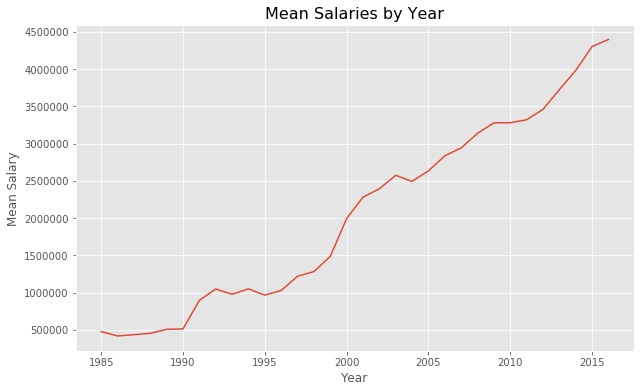

In [39]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(mean_salary_df.groupby('yearID').sum())
plt.title('Mean Salaries by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Salary', fontsize=12);

MLB team payrolls have been increasing at an impressive rate from 1985 to 2016. In 1985 the mean salaries paid to players was about \$260M but by 2016 this amount has ballooned to about \$3.75**B**!

### How does player production stack up against these rising salaries?

In [40]:
# Review total number of runs scored each year
mean_runs_df = teams_df_copy.groupby('yearID', as_index=False)['R'].mean()
mean_runs_df.head()

,yearID,R
0,1985,700.615385
1,1986,713.269231
2,1987,764.730769
3,1988,668.461538
4,1989,669.423077


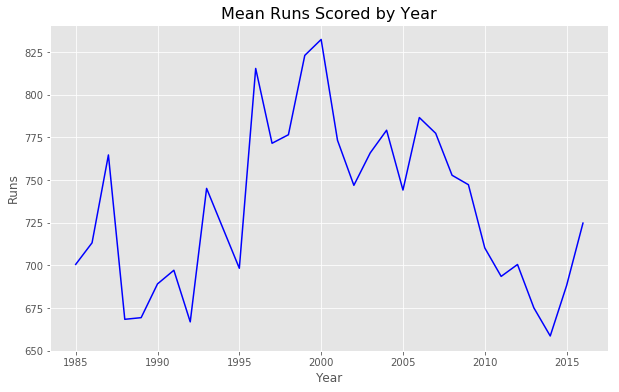

In [41]:
plt.figure(figsize=(10,6))
plt.plot(mean_runs_df['yearID'],mean_runs_df['R'], color = 'b')
plt.title('Mean Runs Scored by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Runs', fontsize=12);

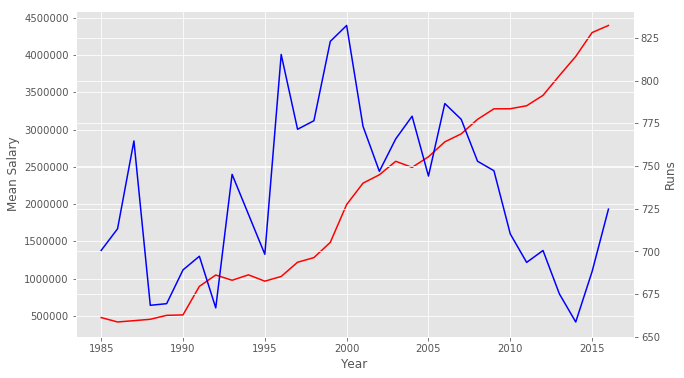

In [42]:
# Combine the Salary and Runs graphs
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Salary')
ax1.plot(mean_salary_df.groupby('yearID').sum(), color='r')

ax2 = ax1.twinx()

ax2.set_ylabel('Runs')
ax2.plot(mean_runs_df['yearID'], mean_runs_df['R'], color = 'b');

Run production hit its peak in the late 1990s into the early 2000s, mostly led by Mark McGuire, Sammy Sosa, and Barry Bonds. Once the MLB implemented stricter drug testing (for PEDs) in the early 2000s, there was a noteable reduction in the amount of runs scored per year. But notice, even with the drop in total runs scored per year, salaries maintained their upward trend.

It seems runs produced may not be as closely correlated with salaries as I originally thought. So, what else could be causing this steady increase in sarlies paid to players?

In [43]:
# Merge relevent batting and pitching data
player_stats_df = batting_df_copy.merge(pitching_df_copy[['playerID','yearID','teamID','SV','ER','BB','SO','ERA']], on=['playerID', 'yearID','teamID'], how='outer')
player_stats_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB_x,SO_x,SV,ER,BB_y,SO_y,ERA
0,aasedo01,1985,1,BAL,AL,54,0,0,0,0,0,0,0,0,0,0,0,14.0,37.0,35.0,67.0,3.78
1,abregjo01,1985,1,CHN,NL,6,9,0,0,0,0,0,1,0,0,0,2,0.0,17.0,12.0,13.0,6.38
2,ackerji01,1985,1,TOR,AL,61,0,0,0,0,0,0,0,0,0,0,0,10.0,31.0,43.0,42.0,3.23
3,adamsri02,1985,1,SFN,NL,54,121,12,23,3,1,2,10,1,1,5,23,NaN,NaN,NaN,NaN,NaN
4,agostju01,1985,1,CHA,AL,54,0,0,0,0,0,0,0,0,0,0,0,1.0,24.0,23.0,39.0,3.58


In [44]:
player_stats_df.rename(columns={'BB_x':'BB_batting',
                                'SO_x':'SO_batting',
                                'BB_y':'BB_pitching',
                                'SO_y':'SO_pitching'}, inplace=True)
player_stats_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB_batting,SO_batting,SV,ER,BB_pitching,SO_pitching,ERA
0,aasedo01,1985,1,BAL,AL,54,0,0,0,0,0,0,0,0,0,0,0,14.0,37.0,35.0,67.0,3.78
1,abregjo01,1985,1,CHN,NL,6,9,0,0,0,0,0,1,0,0,0,2,0.0,17.0,12.0,13.0,6.38
2,ackerji01,1985,1,TOR,AL,61,0,0,0,0,0,0,0,0,0,0,0,10.0,31.0,43.0,42.0,3.23
3,adamsri02,1985,1,SFN,NL,54,121,12,23,3,1,2,10,1,1,5,23,NaN,NaN,NaN,NaN,NaN
4,agostju01,1985,1,CHA,AL,54,0,0,0,0,0,0,0,0,0,0,0,1.0,24.0,23.0,39.0,3.58


In [45]:
# Merge POS into player_status_df
player_stats_df = pd.merge(player_stats_df, fielding_df_copy[['yearID', 'playerID', 'POS']], on=['yearID','playerID'], how='left')
player_stats_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB_batting,SO_batting,SV,ER,BB_pitching,SO_pitching,ERA,POS
0,aasedo01,1985,1,BAL,AL,54,0,0,0,0,0,0,0,0,0,0,0,14.0,37.0,35.0,67.0,3.78,P
1,abregjo01,1985,1,CHN,NL,6,9,0,0,0,0,0,1,0,0,0,2,0.0,17.0,12.0,13.0,6.38,P
2,ackerji01,1985,1,TOR,AL,61,0,0,0,0,0,0,0,0,0,0,0,10.0,31.0,43.0,42.0,3.23,P
3,adamsri02,1985,1,SFN,NL,54,121,12,23,3,1,2,10,1,1,5,23,NaN,NaN,NaN,NaN,NaN,SS
4,agostju01,1985,1,CHA,AL,54,0,0,0,0,0,0,0,0,0,0,0,1.0,24.0,23.0,39.0,3.58,P


In [46]:
# Check for NaNs
player_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40591 entries, 0 to 40590
Data columns (total 23 columns):
playerID       40591 non-null object
yearID         40591 non-null int64
stint          40591 non-null int64
teamID         40591 non-null object
lgID           40591 non-null object
G              40591 non-null int64
AB             40591 non-null int64
R              40591 non-null int64
H              40591 non-null int64
2B             40591 non-null int64
3B             40591 non-null int64
HR             40591 non-null int64
RBI            40591 non-null int32
SB             40591 non-null int32
CS             40591 non-null int32
BB_batting     40591 non-null int64
SO_batting     40591 non-null int32
SV             19997 non-null float64
ER             19997 non-null float64
BB_pitching    19997 non-null float64
SO_pitching    19997 non-null float64
ERA            19978 non-null float64
POS            40280 non-null object
dtypes: float64(5), int32(4), int64(10), object(4

In [47]:
# Remove rows with NaNs in POS column
player_stats_df.dropna(subset=['POS'],inplace=True)

In [48]:
player_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40280 entries, 0 to 40590
Data columns (total 23 columns):
playerID       40280 non-null object
yearID         40280 non-null int64
stint          40280 non-null int64
teamID         40280 non-null object
lgID           40280 non-null object
G              40280 non-null int64
AB             40280 non-null int64
R              40280 non-null int64
H              40280 non-null int64
2B             40280 non-null int64
3B             40280 non-null int64
HR             40280 non-null int64
RBI            40280 non-null int32
SB             40280 non-null int32
CS             40280 non-null int32
BB_batting     40280 non-null int64
SO_batting     40280 non-null int32
SV             19997 non-null float64
ER             19997 non-null float64
BB_pitching    19997 non-null float64
SO_pitching    19997 non-null float64
ERA            19978 non-null float64
POS            40280 non-null object
dtypes: float64(5), int32(4), int64(10), object(4

Ok if there are NaNs for pitching metrics since not everyone is a Pitcher.

In [49]:
# Merge salaries to player_stats_df
player_stats_df = pd.merge(player_stats_df, salaries_df_copy[['yearID','playerID','salary']], on=['yearID','playerID'], how='left')
player_stats_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB_batting,SO_batting,SV,ER,BB_pitching,SO_pitching,ERA,POS,salary
0,aasedo01,1985,1,BAL,AL,54,0,0,0,0,0,0,0,0,0,0,0,14.0,37.0,35.0,67.0,3.78,P,NaN
1,abregjo01,1985,1,CHN,NL,6,9,0,0,0,0,0,1,0,0,0,2,0.0,17.0,12.0,13.0,6.38,P,NaN
2,ackerji01,1985,1,TOR,AL,61,0,0,0,0,0,0,0,0,0,0,0,10.0,31.0,43.0,42.0,3.23,P,170000.0
3,adamsri02,1985,1,SFN,NL,54,121,12,23,3,1,2,10,1,1,5,23,NaN,NaN,NaN,NaN,NaN,SS,NaN
4,agostju01,1985,1,CHA,AL,54,0,0,0,0,0,0,0,0,0,0,0,1.0,24.0,23.0,39.0,3.58,P,147500.0


In [50]:
player_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 24 columns):
playerID       40455 non-null object
yearID         40455 non-null int64
stint          40455 non-null int64
teamID         40455 non-null object
lgID           40455 non-null object
G              40455 non-null int64
AB             40455 non-null int64
R              40455 non-null int64
H              40455 non-null int64
2B             40455 non-null int64
3B             40455 non-null int64
HR             40455 non-null int64
RBI            40455 non-null int32
SB             40455 non-null int32
CS             40455 non-null int32
BB_batting     40455 non-null int64
SO_batting     40455 non-null int32
SV             20091 non-null float64
ER             20091 non-null float64
BB_pitching    20091 non-null float64
SO_pitching    20091 non-null float64
ERA            20072 non-null float64
POS            40455 non-null object
salary         28163 non-null float64
dtypes: flo

Only keep rows where salary data is available.

In [51]:
player_stats_df = player_stats_df[player_stats_df['salary'].notnull()]
player_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28163 entries, 2 to 40454
Data columns (total 24 columns):
playerID       28163 non-null object
yearID         28163 non-null int64
stint          28163 non-null int64
teamID         28163 non-null object
lgID           28163 non-null object
G              28163 non-null int64
AB             28163 non-null int64
R              28163 non-null int64
H              28163 non-null int64
2B             28163 non-null int64
3B             28163 non-null int64
HR             28163 non-null int64
RBI            28163 non-null int32
SB             28163 non-null int32
CS             28163 non-null int32
BB_batting     28163 non-null int64
SO_batting     28163 non-null int32
SV             13369 non-null float64
ER             13369 non-null float64
BB_pitching    13369 non-null float64
SO_pitching    13369 non-null float64
ERA            13361 non-null float64
POS            28163 non-null object
salary         28163 non-null float64
dtypes: flo

In [52]:
mean_player_stats_df = player_stats_df.groupby(['yearID','POS'], as_index=False).mean()
mean_player_stats_df.head()

,yearID,POS,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB_batting,SO_batting,SV,ER,BB_pitching,SO_pitching,ERA,salary
0,1985,1B,1.081633,112.510204,363.734694,47.163265,98.244898,18.265306,1.551020,12.224490,53.571429,2.795918,2.061224,41.306122,49.265306,NaN,NaN,NaN,NaN,NaN,590877.551020
1,1985,2B,1.060606,115.787879,395.242424,53.303030,105.424242,17.545455,3.151515,5.969697,39.090909,13.272727,5.636364,44.030303,46.242424,NaN,NaN,NaN,NaN,NaN,466688.303030
2,1985,3B,1.051282,107.410256,336.794872,42.564103,90.666667,17.307692,1.794872,9.179487,42.051282,3.897436,2.487179,32.230769,47.846154,NaN,NaN,NaN,NaN,NaN,493492.179487
3,1985,C,1.069767,90.744186,277.906977,30.255814,68.790698,12.627907,1.255814,8.488372,35.953488,1.627907,1.604651,27.627907,40.674419,NaN,NaN,NaN,NaN,NaN,447039.651163
4,1985,OF,1.074074,106.933333,342.377778,48.192593,92.029630,16.051852,2.896296,10.296296,44.088889,11.688889,4.148148,33.814815,54.822222,NaN,NaN,NaN,NaN,NaN,491569.607407


C:\Users\giust\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
C:\Users\giust\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


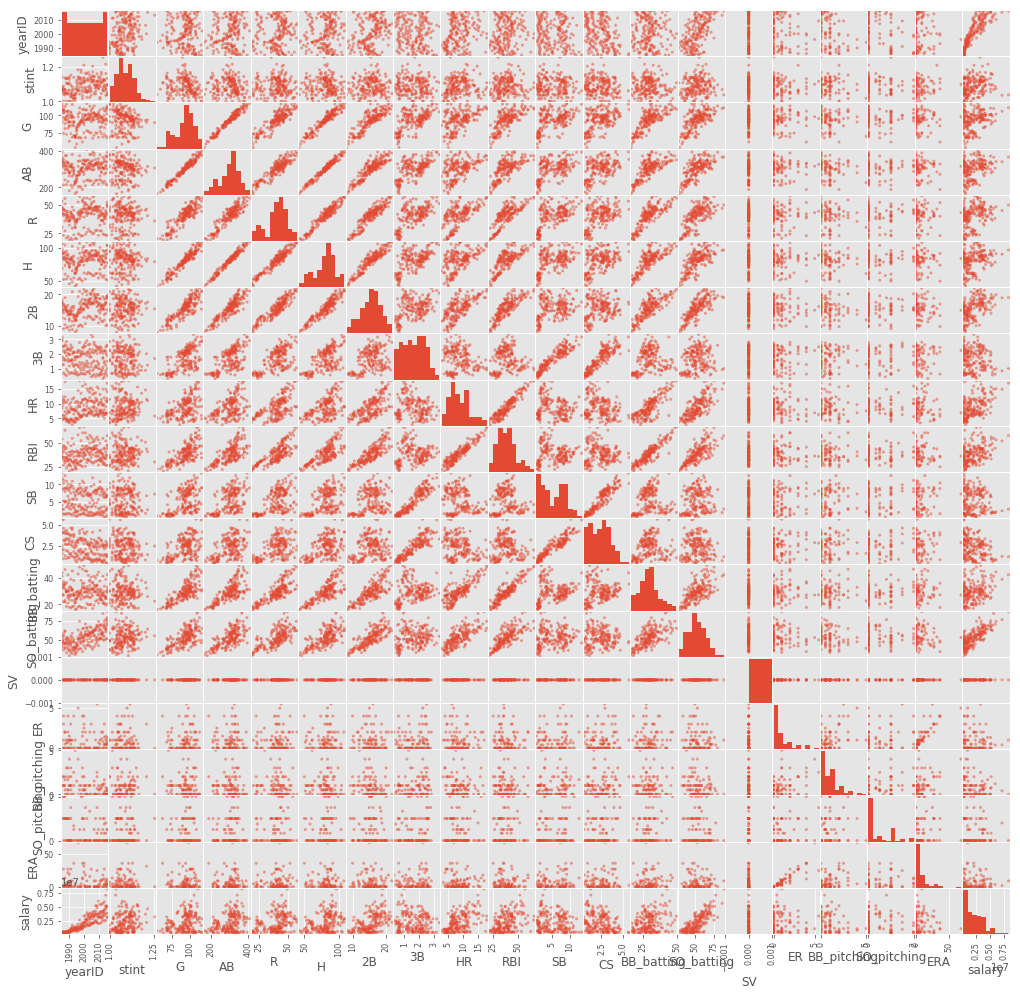

In [53]:
# Scatter matrix for non-pitchers
pd.plotting.scatter_matrix(mean_player_stats_df[mean_player_stats_df['POS'] != 'P'], alpha=0.5, figsize=(17,17));

Interesting...besides mean salaries increasing as each year passes (understandably), the only other strong positive correlation to salaries is acutally SO_Batting (stikeouts by batters). Why is that? Notice that there is a **very** strong positive relationship between the SO_batting and HR metrics. It is possible teams pay players with high HR potential higher salaries in hopes of more run production, however, these same players may be more suseptible to striking out. Investing in high HR players also comes with the risk of high stikeouts.

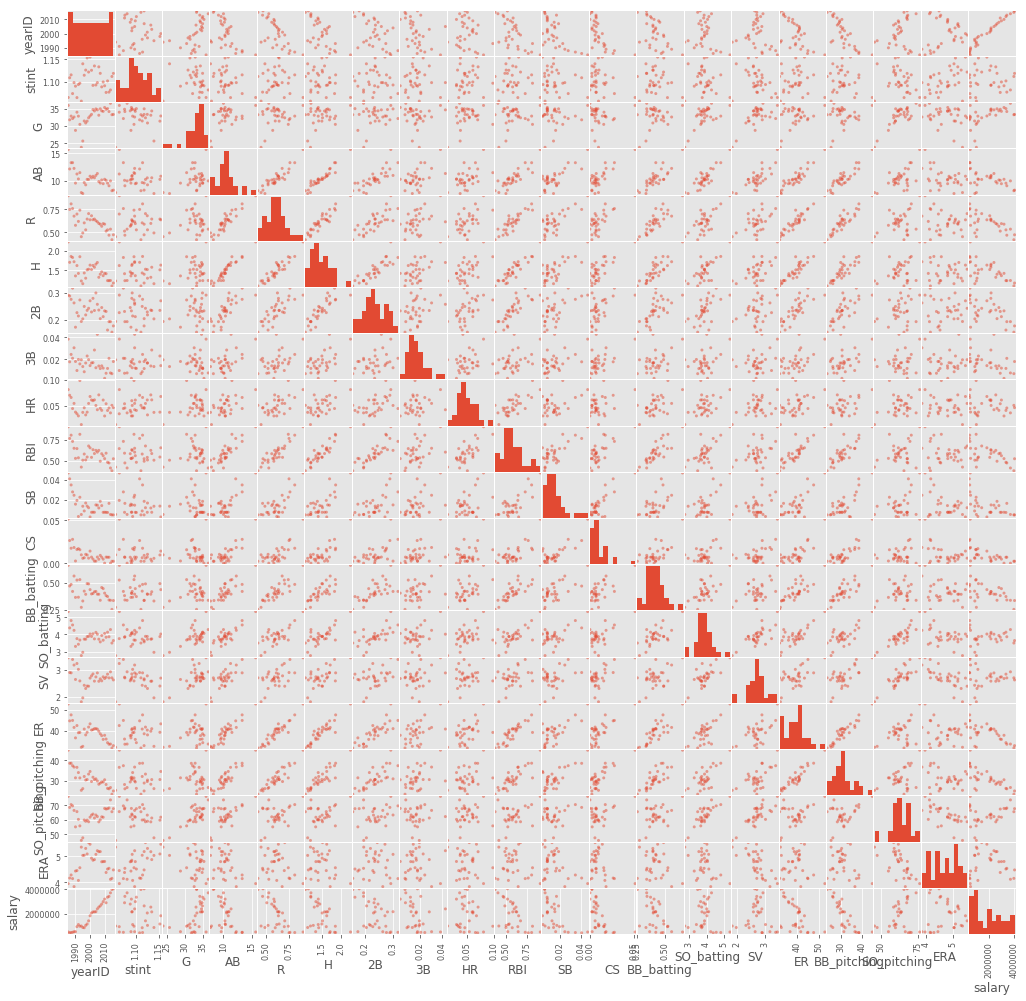

In [56]:
# Scatter matrix for pitchers
pd.plotting.scatter_matrix(mean_player_stats_df[mean_player_stats_df['POS'] == 'P'], alpha=0.5, figsize=(17,17));

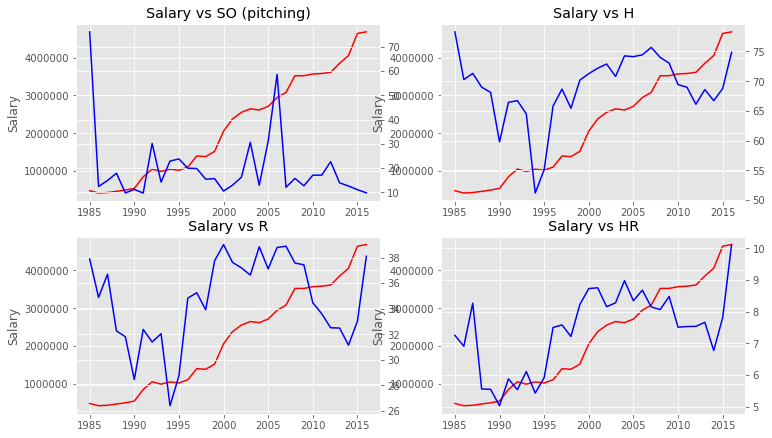

In [62]:
# Combine the Salary and SO graphs
fig = plt.subplots(figsize=(12,15),sharex=True)

ax0 = plt.subplot(421)
ax1 = ax0.twinx()
ax2 = plt.subplot(422)
ax3 = ax2.twinx()
ax4 = plt.subplot(423)
ax5 = ax4.twinx()
ax6 = plt.subplot(424)
ax7 = ax6.twinx()

ax0.plot(mean_player_stats_df.groupby('yearID')['yearID'].mean(),mean_player_stats_df.groupby('yearID')['salary'].mean(),'r')
ax1.plot(mean_player_stats_df.groupby('yearID')['yearID'].mean(),mean_player_stats_df.groupby('yearID')['SO_pitching'].mean(),'b')
ax2.plot(mean_player_stats_df.groupby('yearID')['yearID'].mean(),mean_player_stats_df.groupby('yearID')['salary'].mean(),'r')
ax3.plot(mean_player_stats_df.groupby('yearID')['yearID'].mean(),mean_player_stats_df.groupby('yearID')['H'].mean(),'b')
ax4.plot(mean_player_stats_df.groupby('yearID')['yearID'].mean(),mean_player_stats_df.groupby('yearID')['salary'].mean(),'r')
ax5.plot(mean_player_stats_df.groupby('yearID')['yearID'].mean(),mean_player_stats_df.groupby('yearID')['R'].mean(),'b')
ax6.plot(mean_player_stats_df.groupby('yearID')['yearID'].mean(),mean_player_stats_df.groupby('yearID')['salary'].mean(),'r')
ax7.plot(mean_player_stats_df.groupby('yearID')['yearID'].mean(),mean_player_stats_df.groupby('yearID')['HR'].mean(),'b')

ax0.set_title('Salary vs SO (pitching)')
ax0.set_ylabel('Salary')
ax2.set_title('Salary vs H')
ax2.set_ylabel('Salary')
ax4.set_title('Salary vs R')
ax4.set_ylabel('Salary')
ax6.set_title('Salary vs HR')
ax6.set_ylabel('Salary');

### What position in baseball receives the highest salaries?

In [63]:
# Calculate mean salary for each year
mean_salaries_df = salaries_df_copy.groupby('yearID', as_index=False).mean().round()

# Change 'salary' field name to 'mean_salary'
mean_salaries_df.rename(index=str, columns={'salary':'mean_salary'}, inplace=True)

mean_salaries_df.head()

,yearID,mean_salary
0,1985,476299.0
1,1986,417147.0
2,1987,434729.0
3,1988,453171.0
4,1989,506323.0


In [64]:
# Review players with max saries for each team each year
max_salary_df = salaries_df_copy[salaries_df_copy.groupby('yearID')['salary'].transform(max) == salaries_df_copy['salary']]

# Change 'salary' field name to 'max_salary'
max_salary_df.rename(index=str, columns={'salary':'max_salary'}, inplace=True)

max_salary_df.head()

C:\Users\giust\Anaconda3\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,yearID,teamID,lgID,playerID,max_salary
404,1985,PHI,NL,schmimi01,2130300
1018,1986,NYN,NL,fostege01,2800000
1767,1987,PHI,NL,schmimi01,2127333
2525,1988,SLN,NL,smithoz01,2340000
2884,1989,LAN,NL,hershor01,2766667


In [65]:
# Merge 'mean_salary' into max_salary_df
max_salary_df = pd.merge(max_salary_df, mean_salaries_df, on='yearID')
max_salary_df.head()

,yearID,teamID,lgID,playerID,max_salary,mean_salary
0,1985,PHI,NL,schmimi01,2130300,476299.0
1,1986,NYN,NL,fostege01,2800000,417147.0
2,1987,PHI,NL,schmimi01,2127333,434729.0
3,1988,SLN,NL,smithoz01,2340000,453171.0
4,1989,LAN,NL,hershor01,2766667,506323.0


In [66]:
# Set 'mean_salary' to int 
max_salary_df['mean_salary'] = max_salary_df['mean_salary'].astype(int)

In [67]:
# Merge player info into max_salary_df
max_salary_analysis_df = pd.merge(max_salary_df, master_df_copy, on='playerID', how='left')
max_salary_analysis_df.head()

,yearID,teamID,lgID,playerID,max_salary,mean_salary,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,1985,PHI,NL,schmimi01,2130300,476299,1949.0,9.0,27.0,USA,OH,Dayton,NaN,NaN,NaN,NaN,NaN,NaN,Mike,Schmidt,Michael Jack,195.0,74.0,R,R,1972-09-12,1989-05-28,schmm001,schmimi01
1,1986,NYN,NL,fostege01,2800000,417147,1948.0,12.0,1.0,USA,AL,Tuscaloosa,NaN,NaN,NaN,NaN,NaN,NaN,George,Foster,George Arthur,180.0,73.0,R,R,1969-09-10,1986-09-06,fostg001,fostege01
2,1987,PHI,NL,schmimi01,2127333,434729,1949.0,9.0,27.0,USA,OH,Dayton,NaN,NaN,NaN,NaN,NaN,NaN,Mike,Schmidt,Michael Jack,195.0,74.0,R,R,1972-09-12,1989-05-28,schmm001,schmimi01
3,1988,SLN,NL,smithoz01,2340000,453171,1954.0,12.0,26.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Ozzie,Smith,Osborne Earl,150.0,71.0,B,R,1978-04-07,1996-09-29,smito001,smithoz01
4,1989,LAN,NL,hershor01,2766667,506323,1958.0,9.0,16.0,USA,NY,Buffalo,NaN,NaN,NaN,NaN,NaN,NaN,Orel,Hershiser,Orel Leonard,190.0,75.0,R,R,1983-09-01,2000-06-26,herso001,hershor01


In [68]:
# Merge POS from fielding_df into max_salary_df
max_salary_analysis_df = pd.merge(max_salary_analysis_df, fielding_df_copy[['yearID','playerID','POS']], on=['yearID','playerID'])
max_salary_analysis_df.head()

,yearID,teamID,lgID,playerID,max_salary,mean_salary,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,POS
0,1985,PHI,NL,schmimi01,2130300,476299,1949.0,9.0,27.0,USA,OH,Dayton,NaN,NaN,NaN,NaN,NaN,NaN,Mike,Schmidt,Michael Jack,195.0,74.0,R,R,1972-09-12,1989-05-28,schmm001,schmimi01,1B
1,1986,NYN,NL,fostege01,2800000,417147,1948.0,12.0,1.0,USA,AL,Tuscaloosa,NaN,NaN,NaN,NaN,NaN,NaN,George,Foster,George Arthur,180.0,73.0,R,R,1969-09-10,1986-09-06,fostg001,fostege01,OF
2,1987,PHI,NL,schmimi01,2127333,434729,1949.0,9.0,27.0,USA,OH,Dayton,NaN,NaN,NaN,NaN,NaN,NaN,Mike,Schmidt,Michael Jack,195.0,74.0,R,R,1972-09-12,1989-05-28,schmm001,schmimi01,3B
3,1988,SLN,NL,smithoz01,2340000,453171,1954.0,12.0,26.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Ozzie,Smith,Osborne Earl,150.0,71.0,B,R,1978-04-07,1996-09-29,smito001,smithoz01,SS
4,1989,LAN,NL,hershor01,2766667,506323,1958.0,9.0,16.0,USA,NY,Buffalo,NaN,NaN,NaN,NaN,NaN,NaN,Orel,Hershiser,Orel Leonard,190.0,75.0,R,R,1983-09-01,2000-06-26,herso001,hershor01,P


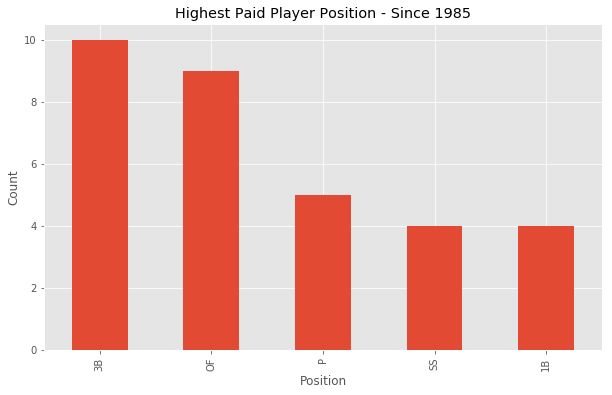

In [69]:
ax = max_salary_analysis_df['POS'].value_counts().plot(figsize=(10,6),kind='bar',
                                                 title = 'Highest Paid Player Position - Since 1985')
ax.set_xlabel('Position')
ax.set_ylabel('Count');

Between 1985-2016, only 5 out of the 7 different positions had a player making the league's highest salary. Seems like you should not be a Catcher (C) or 2B if you are looking to be the highest paid player in baseball.

Let's confirm if 3B and OF positions actually hold the highest salaries in baseball or if these highest paid players are just outliers from their respective populations.

In [70]:
## Review Salaries for every player by position from 1985-2016 ##

In [71]:
salaries_df_copy.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [72]:
salaries_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [73]:
fielding_df_copy.head()

,yearID,playerID,POS,G
84257,1985,aasedo01,P,54
84258,1985,abregjo01,P,6
84259,1985,ackerji01,P,61
84262,1985,adamsri02,SS,25
84263,1985,agostju01,P,54


In [74]:
salaries_pos_df = salaries_df_copy.merge(fielding_df_copy[['yearID','playerID','POS']], on=['yearID','playerID'], how='left')
salaries_pos_df.head()

,yearID,teamID,lgID,playerID,salary,POS
0,1985,ATL,NL,barkele01,870000,P
1,1985,ATL,NL,bedrost01,550000,P
2,1985,ATL,NL,benedbr01,545000,C
3,1985,ATL,NL,campri01,633333,P
4,1985,ATL,NL,ceronri01,625000,C


In [75]:
# Check for and remove NaN's
salaries_pos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26428 entries, 0 to 26427
Data columns (total 6 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
POS         25471 non-null object
dtypes: int64(2), object(4)
memory usage: 1.4+ MB


In [76]:
salaries_pos_df.dropna(inplace=True)
salaries_pos_df.shape

(25471, 6)

In [77]:
# Find number of players at each position
salaries_pos_df['POS'].value_counts()

P     11850
OF     5148
C      2134
1B     1721
3B     1602
2B     1573
SS     1443
Name: POS, dtype: int64

In [78]:
mean_salaries_by_pos = salaries_pos_df.groupby(['yearID','POS'], as_index=False).mean()
mean_salaries_by_pos.rename(columns={'salary':'mean_salary'},inplace=True)
mean_salaries_by_pos.head()

,yearID,POS,mean_salary
0,1985,1B,600300.000000
1,1985,2B,468974.645161
2,1985,3B,473497.243243
3,1985,C,460942.625000
4,1985,OF,493872.512000


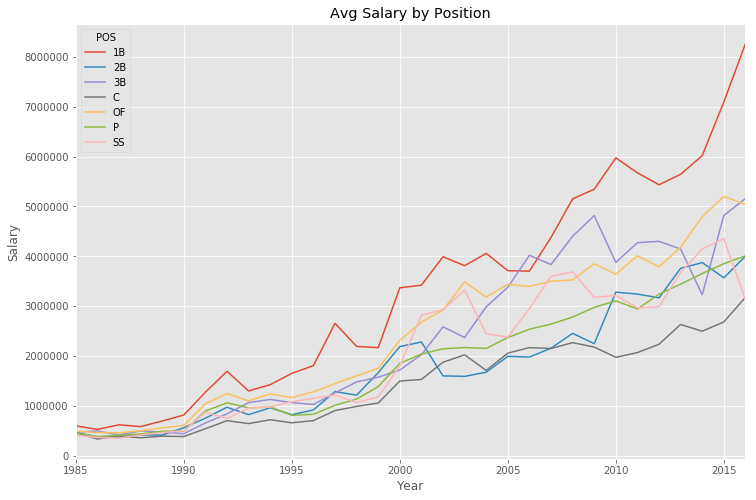

In [79]:
# plot data
fig, ax = plt.subplots(figsize=(12,8))
# use unstack()
mean_salaries_by_pos.groupby(['yearID','POS']).sum()['mean_salary'].unstack().plot(ax=ax)
plt.title('Avg Salary by Position')
plt.xlabel('Year')
plt.ylabel('Salary');

It looks like the 1B players actually make the highest salaries on average, though only 4 1B's have held the highest salary in baseball from 1985-2016. 

## Conclusion



When analyzing baseball statistics and comparing them to salary, it is hard to say if any one measure is positively correlated to salary. However, if you are a non-pitcher, you definitely want to minimzie 